In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import Membrane_pack
from scipy.interpolate import interp1d

from scipy.optimize import minimize
from scipy import interpolate

parameters = {'axes.labelsize': 17,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)
plt.rcParams['font.family'] = 'arial'

import pickle
import warnings
from itertools import product

In [13]:
data = pd.read_csv('PyrSMR_results.csv')
data.columns

Index(['Country', 'HDPE[kg/h]', 'LDPE[kg/h]', 'PP[kg/h]', 'PS[kg/h]',
       'Total[kg/h]', 'Heater_T', 'HDPDCOM_HD', 'LPDECOM_HD', 'PPDECOM_HD',
       'PSDECOM_HD', 'HEATER_HD', 'RPLUG_HD', 'RPYRO_HD', 'B2', 'H2O', 'H2',
       'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C4H10', 'C6H6', 'C7H8', 'C8H10',
       'C9H18', 'C10H8', 'C10H14', 'C14H30', 'C16H34', 'C22H46', 'C', 'O2',
       'C6H6O', 'N2', 'CL2', 'S', 'NRP', 'ASH', 'HDPE', 'PP', 'PS', 'LDPE',
       'PUMP_WNET', 'PUMP_VFLOW', 'COMP_WNET', 'COMP_FEED_VFLOW',
       'HEAT1_QCALC', 'COOL1_QCALC', 'HX1_HX_AREAC', 'HX1_HX_DUTY',
       'HX2_HX_AREAC', 'HX2_HX_DUTY', 'SMR_QCALC', 'SMR_TOT_MASS_ABS', 'CH4.1',
       'CO.1', 'CO2.1', 'H2.1', 'H2O.1', 'H2 production'],
      dtype='object')

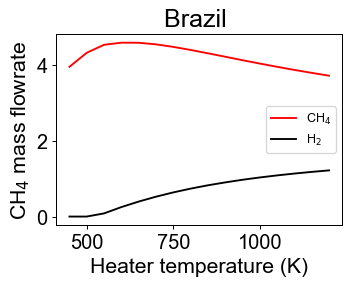

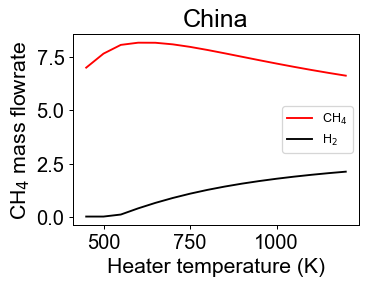

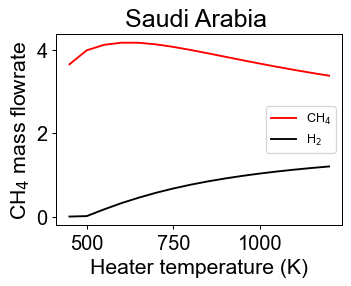

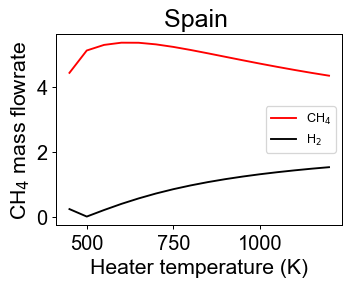

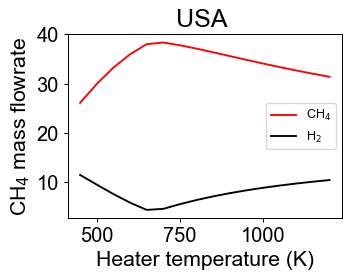

In [39]:
for i in range(5):
    plt.figure(figsize=(4,3), dpi=90)
    tmp = data.iloc[i*16:(i+1)*16]
    plt.plot(tmp['Heater_T'], tmp['CH4'], c='r', label='CH$_4$')
    plt.plot(tmp['Heater_T'], tmp['H2'], c='k', label='H$_2$')
    plt.xlabel('Heater temperature (K)')
    plt.ylabel('CH$_4$ mass flowrate')
    plt.legend()
    plt.tight_layout()
    plt.title(tmp.iloc[0,:]['Country'])
    plt.show()

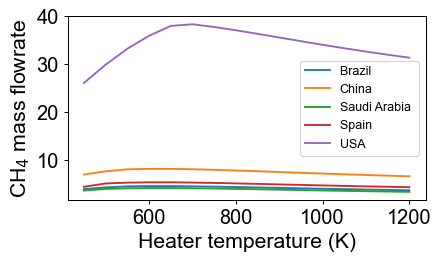

In [38]:
plt.figure(figsize=(5,3), dpi=90)
for i in range(5):
    tmp = data.iloc[i*16:(i+1)*16]
    plt.plot(tmp['Heater_T'], tmp['CH4'], label=tmp.iloc[0,:]['Country'])
    plt.xlabel('Heater temperature (K)')
    plt.ylabel('CH$_4$ mass flowrate')
plt.legend()
plt.tight_layout()
plt.show()

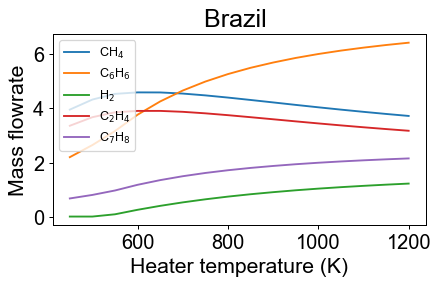

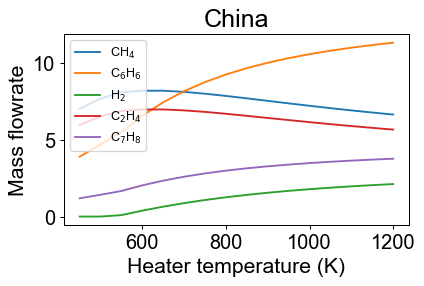

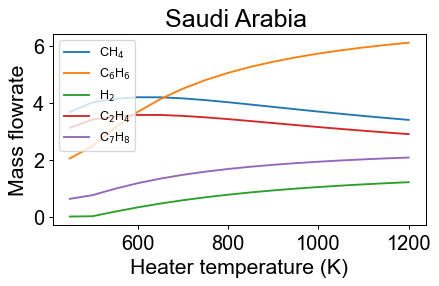

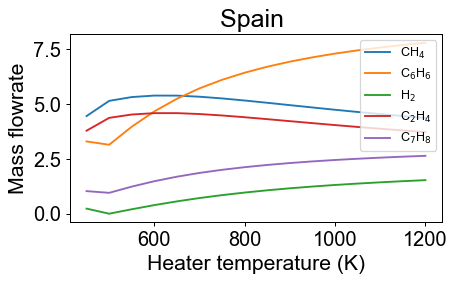

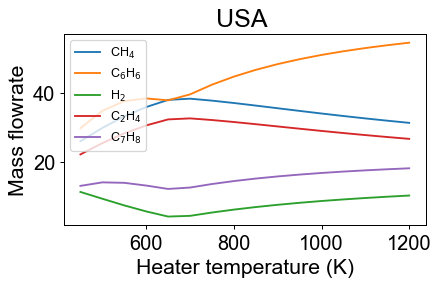

In [41]:
for i in range(5):
    plt.figure(figsize=(5,3), dpi=90)
    tmp = data.iloc[i*16:(i+1)*16]
    plt.plot(tmp['Heater_T'], tmp['CH4'], label='CH$_4$')
    plt.plot(tmp['Heater_T'], tmp['C6H6'],  label='C$_6$H$_6$')
    plt.plot(tmp['Heater_T'], tmp['H2'], label='H$_2$')
    plt.plot(tmp['Heater_T'], tmp['C2H4'], label='C$_2$H$_4$')
    plt.plot(tmp['Heater_T'], tmp['C7H8'], label='C$_7$H$_8$')
   
    plt.xlabel('Heater temperature (K)')
    plt.ylabel('Mass flowrate')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(tmp.iloc[0,:]['Country'])
    plt.show()

In [42]:
data.columns

Index(['Country', 'HDPE[kg/h]', 'LDPE[kg/h]', 'PP[kg/h]', 'PS[kg/h]',
       'Total[kg/h]', 'Heater_T', 'HDPDCOM_HD', 'LPDECOM_HD', 'PPDECOM_HD',
       'PSDECOM_HD', 'HEATER_HD', 'RPLUG_HD', 'RPYRO_HD', 'B2', 'H2O', 'H2',
       'CO', 'CO2', 'CH4', 'C2H6', 'C2H4', 'C4H10', 'C6H6', 'C7H8', 'C8H10',
       'C9H18', 'C10H8', 'C10H14', 'C14H30', 'C16H34', 'C22H46', 'C', 'O2',
       'C6H6O', 'N2', 'CL2', 'S', 'NRP', 'ASH', 'HDPE', 'PP', 'PS', 'LDPE',
       'PUMP_WNET', 'PUMP_VFLOW', 'COMP_WNET', 'COMP_FEED_VFLOW',
       'HEAT1_QCALC', 'COOL1_QCALC', 'HX1_HX_AREAC', 'HX1_HX_DUTY',
       'HX2_HX_AREAC', 'HX2_HX_DUTY', 'SMR_QCALC', 'SMR_TOT_MASS_ABS', 'CH4.1',
       'CO.1', 'CO2.1', 'H2.1', 'H2O.1', 'H2 production'],
      dtype='object')

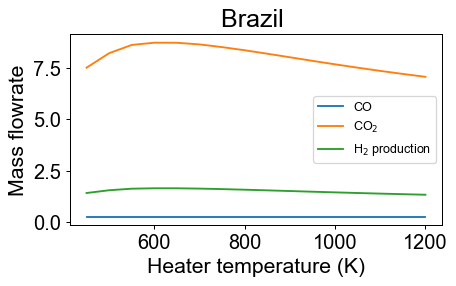

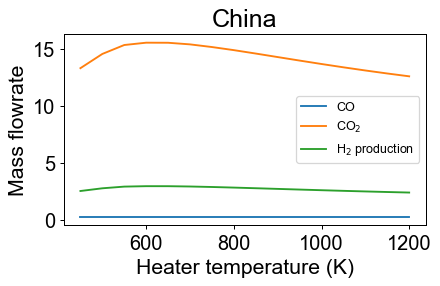

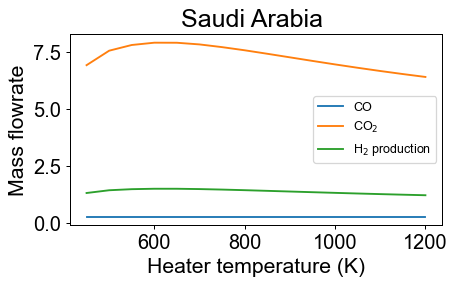

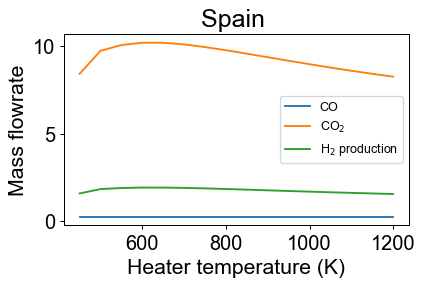

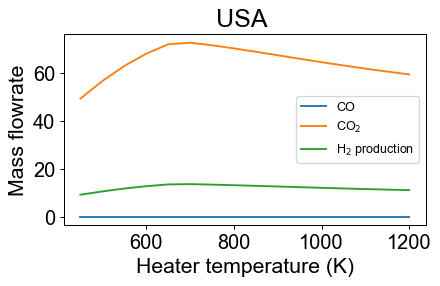

In [45]:
for i in range(5):
    plt.figure(figsize=(5,3), dpi=90)
    tmp = data.iloc[i*16:(i+1)*16]
    # plt.plot(tmp['Heater_T'], tmp['CH4.1'], label='CH$_4$')
    plt.plot(tmp['Heater_T'], tmp['CO.1'],  label='CO')
    plt.plot(tmp['Heater_T'], tmp['CO2.1'], label='CO$_2$')
    # plt.plot(tmp['Heater_T'], tmp['H2.1'], label='H$_2$')
    # plt.plot(tmp['Heater_T'], tmp['H2O.1'], label='H$_2$O')
    plt.plot(tmp['Heater_T'], tmp['H2 production'], label='H$_2$ production')
   
    plt.xlabel('Heater temperature (K)')
    plt.ylabel('Mass flowrate')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(tmp.iloc[0,:]['Country'])
    plt.show()

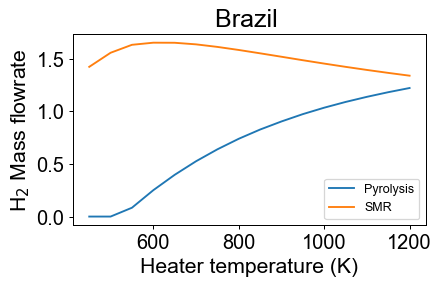

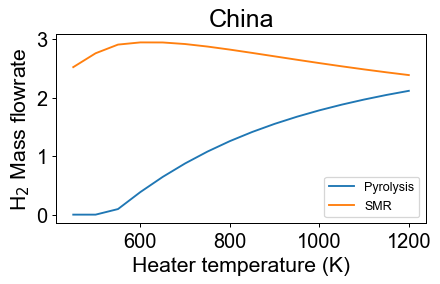

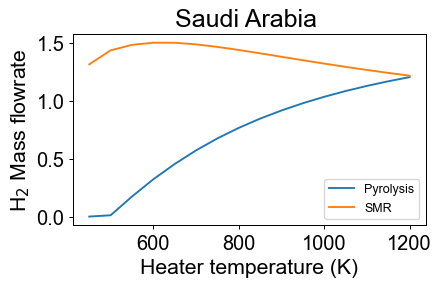

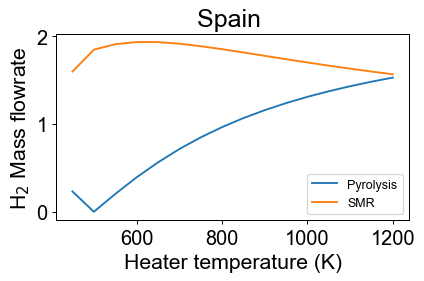

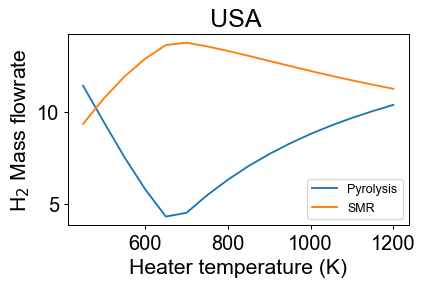

In [46]:
for i in range(5):
    plt.figure(figsize=(5,3), dpi=90)
    tmp = data.iloc[i*16:(i+1)*16]
    plt.plot(tmp['Heater_T'], tmp['H2'], label='Pyrolysis')
    plt.plot(tmp['Heater_T'], tmp['H2 production'], label='SMR')
   
    plt.xlabel('Heater temperature (K)')
    plt.ylabel('H$_2$ Mass flowrate')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(tmp.iloc[0,:]['Country'])
    plt.show()